In [1]:
import pandas as pd
import statsmodels.api as sm
import re
import numpy as np
import pandas as pd
from itertools import product

In [2]:
def remove_pattern(col_name):
    return re.sub(r'_[0-9]{3}$', '', col_name)

Zones = pd.read_excel('Zones.xlsx')
Dataset = pd.read_csv('KAG 2016-17/Agriculture/Agriculture_KAG_2016_17.csv')
Dataset.columns = map(remove_pattern, Dataset.columns)

param = pd.read_csv('Params/3_Param_Maize_Multicollinearity.csv')

Working_Directory = pd.read_csv('Working_Directory.csv')
Working_Directory = Working_Directory[['District','Maize_Production','TotalNPK', 'SowingSeedsDistributed_Maize',
'LivestockCensus_2012_Cattle', 'AreaUnderCereals_Maize','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','Maize_Ratio']].copy()

for x in param.columns:
    if(x != 'SowingSeedsDistributed_Maize' and x != 'AreaUnderCereals_Maize'):
        Working_Directory[x] = Working_Directory[x]*Working_Directory['Maize_Ratio']
        
Working_Directory[24:]

,District,Maize_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Maize_Ratio
24,BALLARI,104045,8404.154608,2859.005,23446.847903,49869.5,75198,0.136288
25,BIDAR,2791,249.381182,24.550,2371.831678,1382.0,19908,0.010114
26,KALABURAGI,14621,710.101614,165.000,6221.617910,2634.0,48802,0.013150
27,YADGIRI,2673,368.617469,0.000,1253.317144,961.0,22035,0.004033
28,RAICHUR,723,61.547519,14.350,188.537479,2600.0,26571,0.000525
29,KOPPAL,190252,10997.550403,5292.000,38936.400172,48210.0,82552,0.149521
30,VIJAYANAGARA,104045,8404.154608,2859.005,23446.847903,49869.5,75198,0.136288


In [3]:
Case_file = pd.read_csv('Params/3_Param_Maize_Multicollinearity.csv')
for x in Case_file.columns:
    Working_Directory[x] = Case_file[x]
y = Working_Directory['Maize_Production']
Case_file[:5]

,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK
0,2567.461578,1129.0,438.180210
1,25037.139270,14867.0,3036.080250
2,7729.614277,1987.0,222.225258
3,83821.593090,92194.0,10902.406570
4,85657.632090,173400.0,25702.835480


In [4]:
Working_Directory

,District,Maize_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Maize_Ratio
0,BENGALURU,2879,438.180210,4.450,2567.461578,1129.0,9348,0.018798
1,BENGALURU(R),42583,3036.080250,134.730,25037.139270,14867.0,20281,0.157645
2,RAMANAGARA,10450,222.225258,260.150,7729.614277,1987.0,23868,0.029741
3,CHITRADURGA,271975,10902.406570,5004.000,83821.593090,92194.0,92506,0.303824
4,DAVANAGERE,593544,25702.835480,6124.600,85657.632090,173400.0,78364,0.257947
5,KOLAR,1759,220.782906,51.500,2278.829821,640.0,20140,0.009950
6,CHIKKABALLAPURA,105491,8196.896749,3538.150,71206.945310,59377.0,50370,0.289061
7,SHIVAMOGGA,226532,10428.246260,3814.020,104722.000400,43827.0,32347,0.184215
8,TUMAKURU,66868,2746.313635,1639.850,37944.093760,24207.0,144708,0.071991
9,CHIKKAMAGALURU,61353,8156.290370,2923.790,40572.445630,25831.0,26174,0.120188


In [5]:
if(len(Case_file) < 31):
    row_24 = Case_file.iloc[24]
    halved_row_24 = row_24 / 2
    Case_file.iloc[24] = halved_row_24
    Case_file.loc[len(Case_file)] = halved_row_24

Case_file[24:]


,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK
24,23446.847900,49869.5,8404.154608
25,2371.831678,1382.0,249.381182
26,6221.617910,2634.0,710.101614
27,1253.317144,961.0,368.617469
28,188.537479,2600.0,61.547519
29,38936.400170,48210.0,10997.550400
30,23446.847900,49869.5,8404.154608


In [6]:
Case_file

,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK
0,2567.461578,1129.0,438.180210
1,25037.139270,14867.0,3036.080250
2,7729.614277,1987.0,222.225258
3,83821.593090,92194.0,10902.406570
4,85657.632090,173400.0,25702.835480
5,2278.829821,640.0,220.782906
6,71206.945310,59377.0,8196.896749
7,104722.000400,43827.0,10428.246260
8,37944.093760,24207.0,2746.313635
9,40572.445630,25831.0,8156.290370


In [7]:
import plotly.express as px

# Create a histogram for Maize_Production
fig = px.histogram(Working_Directory, x='Maize_Production', nbins=10, title='Frequency Distribution of Maize Production')

# Show the histogram
fig.show()

In [8]:
# List of desired percentiles
percentiles = [0.1, 0.15, 0.20, 0.25, 0.75, 0.90, 0.95, 0.99]

# Calculate quantiles for the given percentiles
quantile_values = Working_Directory['Maize_Production'].quantile(percentiles)

# Print each quantile with its corresponding percentile
for p, q in zip(percentiles, quantile_values):
    print(f"{int(p*100)}th percentile: {q}")

10th percentile: 1759.0
15th percentile: 2732.0
20th percentile: 2879.0
25th percentile: 12535.5
75th percentile: 208289.5
90th percentile: 333937.0
95th percentile: 495122.5
99th percentile: 588508.2


In [9]:
Working_Directory

,District,Maize_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Maize_Ratio
0,BENGALURU,2879,438.180210,4.450,2567.461578,1129.0,9348,0.018798
1,BENGALURU(R),42583,3036.080250,134.730,25037.139270,14867.0,20281,0.157645
2,RAMANAGARA,10450,222.225258,260.150,7729.614277,1987.0,23868,0.029741
3,CHITRADURGA,271975,10902.406570,5004.000,83821.593090,92194.0,92506,0.303824
4,DAVANAGERE,593544,25702.835480,6124.600,85657.632090,173400.0,78364,0.257947
5,KOLAR,1759,220.782906,51.500,2278.829821,640.0,20140,0.009950
6,CHIKKABALLAPURA,105491,8196.896749,3538.150,71206.945310,59377.0,50370,0.289061
7,SHIVAMOGGA,226532,10428.246260,3814.020,104722.000400,43827.0,32347,0.184215
8,TUMAKURU,66868,2746.313635,1639.850,37944.093760,24207.0,144708,0.071991
9,CHIKKAMAGALURU,61353,8156.290370,2923.790,40572.445630,25831.0,26174,0.120188


Finding the delta after removing the districts that are outliers, then for rest of the calculation we only remove the lower outliers.
We tried replacement using the Q1 and Q3 percentile methods :
1) We tried finding outliers using the lower and upper bounds, but that was giving unsatisfactory results with the partitioning.
2) We used the Q1 and Q3 values as the bounds and replaced values below and above them with Q1 and Q3 resp., this wasn't as successful as we anticipated (Percentage changes of 500% for 5% delta, 1000% for 10% delta) so we are back to the discarding method.

In [10]:
print((Working_Directory['Maize_Production'].mean()))

134853.12903225806


In [11]:
# Ensure that the index of y and Case_file are aligned
y = y.loc[Case_file.index]

# Identify rows in Case_file that have any zeros
rows_to_remove = (Case_file == 0).any(axis=1)

rows_to_remove |= Working_Directory['Maize_Production']  < 1000

rows_to_remove |= Working_Directory['Maize_Production'] > 500000

delta_O = 0.0368*(Working_Directory[~rows_to_remove]['Maize_Production'].mean())

print((Working_Directory[~rows_to_remove]['Maize_Production'].mean()))

print(0.0368*(Working_Directory[~rows_to_remove]['Maize_Production'].mean()))
print(0.05*(Working_Directory[~rows_to_remove]['Maize_Production'].mean()))
print(0.08*(Working_Directory[~rows_to_remove]['Maize_Production'].mean()))

rows_to_remove = (Case_file == 0).any(axis=1)

rows_to_remove |= Working_Directory['Maize_Production']  < 1000

# rows_to_remove |= Working_Directory['Maize_Production'] > 500000

# Update Case_file and y
Case_file = Case_file[~rows_to_remove].reset_index(drop=True)
y = Working_Directory['Maize_Production'][~rows_to_remove].reset_index(drop=True)

# Verify the length of Case_file
case_file_length = len(Case_file)
print(case_file_length)

115742.80769230769
4259.335323076923
5787.140384615384
9259.424615384616
28


In [12]:
Case_file.columns

Index(['LivestockCensus_2012_Cattle', 'AreaUnderCereals_Maize', 'TotalNPK'], dtype='object')

In [13]:
import plotly.express as px
import pandas as pd

# Melt the DataFrame to a long format for easier plotting
Case_file_melt = Case_file.melt(var_name='Columns', value_name='Values')

# Create box plots for each column
fig = px.box(Case_file_melt, x='Columns', y='Values', title='Box Plots of Case_file Columns and Maize Production',points = "all")

# Show the figure
fig.show()


In [14]:
Case_file_melt = Working_Directory[['Maize_Production']].melt(var_name='Maize_Production', value_name='Production')

# Create box plots for each column
fig = px.box(Case_file_melt[1:], x='Maize_Production', y='Production', title='Box Plot of Maize Production',points = "all")

# Show the figure
fig.show()

In [15]:
TotalNPK_data = Case_file[['TotalNPK']]

fig = px.box(TotalNPK_data, y='TotalNPK', title='Box Plot of TotalNPK', points='all')

fig.show()

In [16]:
Case_file

,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK
0,2567.461578,1129.0,438.180210
1,25037.139270,14867.0,3036.080250
2,7729.614277,1987.0,222.225258
3,83821.593090,92194.0,10902.406570
4,85657.632090,173400.0,25702.835480
5,2278.829821,640.0,220.782906
6,71206.945310,59377.0,8196.896749
7,104722.000400,43827.0,10428.246260
8,37944.093760,24207.0,2746.313635
9,40572.445630,25831.0,8156.290370


In [17]:
Case_file =sm.add_constant(Case_file)
Case_file.head()

,const,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK
0,1.0,2567.461578,1129.0,438.180210
1,1.0,25037.139270,14867.0,3036.080250
2,1.0,7729.614277,1987.0,222.225258
3,1.0,83821.593090,92194.0,10902.406570
4,1.0,85657.632090,173400.0,25702.835480


In [18]:
# Case_file_1 = Case_file[['const','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','AreaUnderCereals_Maize','TotalNPK']].copy()

In [19]:
Working_Directory

,District,Maize_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Maize_Ratio
0,BENGALURU,2879,438.180210,4.450,2567.461578,1129.0,9348,0.018798
1,BENGALURU(R),42583,3036.080250,134.730,25037.139270,14867.0,20281,0.157645
2,RAMANAGARA,10450,222.225258,260.150,7729.614277,1987.0,23868,0.029741
3,CHITRADURGA,271975,10902.406570,5004.000,83821.593090,92194.0,92506,0.303824
4,DAVANAGERE,593544,25702.835480,6124.600,85657.632090,173400.0,78364,0.257947
5,KOLAR,1759,220.782906,51.500,2278.829821,640.0,20140,0.009950
6,CHIKKABALLAPURA,105491,8196.896749,3538.150,71206.945310,59377.0,50370,0.289061
7,SHIVAMOGGA,226532,10428.246260,3814.020,104722.000400,43827.0,32347,0.184215
8,TUMAKURU,66868,2746.313635,1639.850,37944.093760,24207.0,144708,0.071991
9,CHIKKAMAGALURU,61353,8156.290370,2923.790,40572.445630,25831.0,26174,0.120188


In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['LivestockCensus_2012_Cattle','AreaUnderCereals_Maize','TotalNPK']

Case_file_1 = Case_file[['const'] + columns_to_standardize].copy()
scaler = StandardScaler()

X_st = pd.DataFrame()
X_st['const'] = Case_file['const']
# X_st[columns_to_standardize] = scaler.fit_transform(Case_file_1[columns_to_standardize])
X_st[columns_to_standardize] = Case_file_1[columns_to_standardize]

Target = 0.05
y_st = pd.DataFrame()
y_st['Maize_Production'] = Working_Directory[~rows_to_remove]['Maize_Production'].reset_index(drop=True)
# y_st['Target_Production'] = (1+Target)*y_st['Maize_Production']
# columns_to_standardize = ['Maize_Production','Target_Production']

columns_to_standardize = ['Maize_Production']
# y_st[columns_to_standardize] = scaler.fit_transform(y_st[columns_to_standardize])
# columns_to_standardize = ['GroundNut Production','Target Production']
y_st.head()

,Maize_Production
0,2879
1,42583
2,10450
3,271975
4,593544


In [21]:
y_st

,Maize_Production
0,2879
1,42583
2,10450
3,271975
4,593544
5,1759
6,105491
7,226532
8,66868
9,61353


In [22]:
# Get the row with the maximum value in 'Maize_Production'
max_row = Working_Directory[~rows_to_remove][Working_Directory[~rows_to_remove]['Maize_Production'] == Working_Directory[~rows_to_remove]['Maize_Production'].max()]

# Get the row with the minimum value in 'Maize_Production'
min_row = Working_Directory[~rows_to_remove][Working_Directory[~rows_to_remove]['Maize_Production'] == Working_Directory[~rows_to_remove]['Maize_Production'].min()]

# Print the rows
print("Row with maximum Maize_Production:\n", max_row)
print("\nRow with minimum Maize_Production:\n", min_row)


Row with maximum Maize_Production:
      District  Maize_Production     TotalNPK  SowingSeedsDistributed_Maize  \
4  DAVANAGERE            593544  25702.83548                        6124.6   

   LivestockCensus_2012_Cattle  AreaUnderCereals_Maize  \
4                  85657.63209                173400.0   

   NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea  \
4                                              78364                  

   Maize_Ratio  
4     0.257947  

Row with minimum Maize_Production:
   District  Maize_Production    TotalNPK  SowingSeedsDistributed_Maize  \
5    KOLAR              1759  220.782906                          51.5   

   LivestockCensus_2012_Cattle  AreaUnderCereals_Maize  \
5                  2278.829821                   640.0   

   NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea  \
5                                              20140                  

   Maize_Ratio  
5      0.00995  


In [23]:
# model=sm.OLS(y,Case_file_1).fit()
# print(model.summary())
# model.params.values
# coef=model.params.values[1:]
# coef

model=sm.OLS(y_st['Maize_Production'],X_st).fit()
Case_file = X_st
print(model.summary())
model.params.values
coef=model.params.values[1:]
coef

                            OLS Regression Results                            
Dep. Variable:       Maize_Production   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     160.9
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           5.01e-16
Time:                        13:57:30   Log-Likelihood:                -332.85
No. Observations:                  28   AIC:                             673.7
Df Residuals:                      24   BIC:                             679.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

array([0.57835467, 1.77855209, 5.83482942])

In [24]:
Case_file.drop('const',axis=1,inplace=True)
Case_file[:5]

,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK
0,2567.461578,1129.0,438.180210
1,25037.139270,14867.0,3036.080250
2,7729.614277,1987.0,222.225258
3,83821.593090,92194.0,10902.406570
4,85657.632090,173400.0,25702.835480


In [25]:
Case_file.loc[:,'Beta_0'] = model.params.values[0]
Case_file.loc[:,'Beta_1'] = coef[0]
Case_file.loc[:,'Beta_2'] = coef[1]
Case_file.loc[:,'Beta_3'] = coef[2]
# Case_file.loc[:,'Beta_4'] = coef[3]
# Case_file.loc[:,'Beta_5'] = coef[4]

intervals = np.arange(0, 1.1, 0.1)
# columns=['Sensitivity_SowingSeedsDistributed_Maize', 'Sensitivity_LivestockCensus_2012_Cattle' , 'Sensitivity_AreaUnderCereals_Maize', 'Sensitivity_TotalNPK','Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea']

columns=['Sensitivity_LivestockCensus_2012_Cattle' , 'Sensitivity_AreaUnderCereals_Maize', 'Sensitivity_TotalNPK']
# Generate all possible combinations of elements in arr

num = len(columns)
combinations = product(intervals, repeat=len(columns))
combinations

In [26]:
alpha_df = pd.DataFrame(combinations, columns=columns)
alpha_df

,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK
0,0.0,0.0,0.0
1,0.0,0.0,0.1
2,0.0,0.0,0.2
3,0.0,0.0,0.3
4,0.0,0.0,0.4
...,...,...,...
1326,1.0,1.0,0.6
1327,1.0,1.0,0.7
1328,1.0,1.0,0.8
1329,1.0,1.0,0.9


In [27]:
Case_file['key'] = 1
alpha_df['key'] = 1

# Performing the Cartesian product
result_df = pd.merge( alpha_df, Case_file, on='key').drop('key', axis=1)

print(result_df)

       Sensitivity_LivestockCensus_2012_Cattle  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
37263                                      1.0   
37264                                      1.0   
37265                                      1.0   
37266                                      1.0   
37267                                      1.0   

       Sensitivity_AreaUnderCereals_Maize  Sensitivity_TotalNPK  \
0                                     0.0                   0.0   
1                                     0.0                   0.0   
2                                     0.0                   0.0   
3                                     0.0                   0.0   
4                                     0.0                   0.0 

In [28]:
result_df.head()

,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,Beta_0,Beta_1,Beta_2,Beta_3
0,0.0,0.0,0.0,2567.461578,1129.0,438.180210,-7629.70252,0.578355,1.778552,5.834829
1,0.0,0.0,0.0,25037.139270,14867.0,3036.080250,-7629.70252,0.578355,1.778552,5.834829
2,0.0,0.0,0.0,7729.614277,1987.0,222.225258,-7629.70252,0.578355,1.778552,5.834829
3,0.0,0.0,0.0,83821.593090,92194.0,10902.406570,-7629.70252,0.578355,1.778552,5.834829
4,0.0,0.0,0.0,85657.632090,173400.0,25702.835480,-7629.70252,0.578355,1.778552,5.834829


In [29]:
Working_Directory['Maize_Production'].mean()

134853.12903225806

In [30]:
Working_Directory.columns

Index(['District', 'Maize_Production', 'TotalNPK',
       'SowingSeedsDistributed_Maize', 'LivestockCensus_2012_Cattle',
       'AreaUnderCereals_Maize',
       'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea',
       'Maize_Ratio'],
      dtype='object')

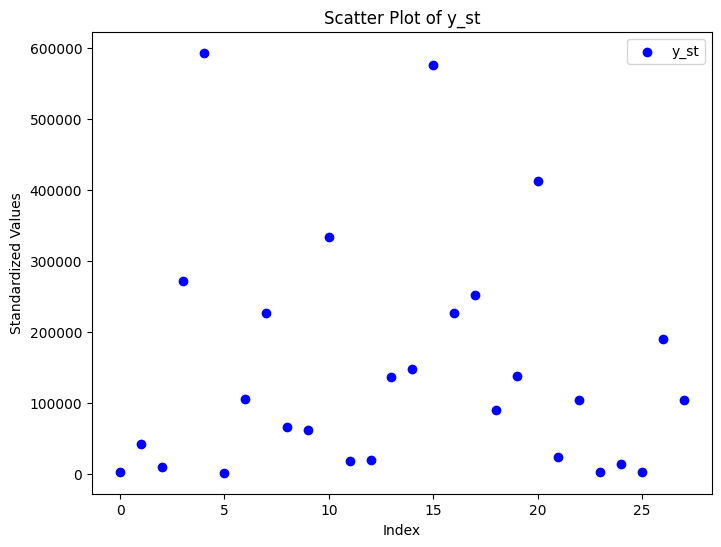

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_st)), y_st, color='blue', label='y_st')

# Adding labels and title
plt.title('Scatter Plot of y_st')
plt.xlabel('Index')
plt.ylabel('Standardized Values')

# Show legend and plot
plt.legend()
plt.show()


In [32]:
y_st

,Maize_Production
0,2879
1,42583
2,10450
3,271975
4,593544
5,1759
6,105491
7,226532
8,66868
9,61353


In [33]:
# delta_O = 0.05*(Working_Directory.drop([10])['Maize_Production'].mean())
# delta_O

In [34]:
# delta_O = 5000

# result_df['New_F1'] = result_df['SowingSeedsDistributed_Maize'] + (result_df['Sensitivity_SowingSeedsDistributed_Maize']*delta_O)/result_df['Beta_1']
result_df['New_F1'] = result_df['LivestockCensus_2012_Cattle'] + (result_df['Sensitivity_LivestockCensus_2012_Cattle']*delta_O)/result_df['Beta_1']
result_df['New_F2'] = result_df['AreaUnderCereals_Maize'] + (result_df['Sensitivity_AreaUnderCereals_Maize']*delta_O)/result_df['Beta_2']
result_df['New_F3'] = result_df['TotalNPK'] + (result_df['Sensitivity_TotalNPK']*delta_O)/result_df['Beta_3']
# result_df['New_F4'] = result_df['NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'] + (result_df['Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea']*delta_O)/result_df['Beta_4']
result_df['District'] = np.tile(Working_Directory[~rows_to_remove]['District'],11**num)

result_df['New_F1'] = result_df['New_F1'].apply(lambda x: max(0, x))
result_df['New_F2'] = result_df['New_F2'].apply(lambda x: max(0, x))
result_df['New_F3'] = result_df['New_F3'].apply(lambda x: max(0, x))
# result_df['New_F4'] = result_df['New_F4'].apply(lambda x: max(0, x))
# result_df['New_F5'] = result_df['New_F5'].apply(lambda x: max(0, x))

In [35]:
result_df['New_Production'] = result_df['Beta_1'] * result_df['New_F1'] + result_df['Beta_2'] * result_df['New_F2'] + result_df['Beta_3'] * result_df['New_F3']+ result_df['Beta_0']
# + result_df['Beta_4'] * result_df['New_F4']  + result_df['Beta_5'] * result_df['New_F5'] + result_df['Beta_0']
result_df['New_Production'] = result_df['New_Production'].apply(lambda x: max(0, x))

result_df

,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,Beta_0,Beta_1,Beta_2,Beta_3,New_F1,New_F2,New_F3,District,New_Production
0,0.0,0.0,0.0,2567.461578,1129.0,438.180210,-7629.70252,0.578355,1.778552,5.834829,2567.461578,1129.000000,438.180210,BENGALURU,0.000000
1,0.0,0.0,0.0,25037.139270,14867.0,3036.080250,-7629.70252,0.578355,1.778552,5.834829,25037.139270,14867.000000,3036.080250,BENGALURU(R),51007.388234
2,0.0,0.0,0.0,7729.614277,1987.0,222.225258,-7629.70252,0.578355,1.778552,5.834829,7729.614277,1987.000000,222.225258,RAMANAGARA,1671.385475
3,0.0,0.0,0.0,83821.593090,92194.0,10902.406570,-7629.70252,0.578355,1.778552,5.834829,83821.593090,92194.000000,10902.406570,CHITRADURGA,268434.421553
4,0.0,0.0,0.0,85657.632090,173400.0,25702.835480,-7629.70252,0.578355,1.778552,5.834829,85657.632090,173400.000000,25702.835480,DAVANAGERE,500283.382616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37263,1.0,1.0,1.0,2371.831678,1382.0,249.381182,-7629.70252,0.578355,1.778552,5.834829,9736.404916,3776.833045,979.365731,BIDAR,10433.119030
37264,1.0,1.0,1.0,6221.617910,2634.0,710.101614,-7629.70252,0.578355,1.778552,5.834829,13586.191148,5028.833045,1440.086163,KALABURAGI,17574.633227
37265,1.0,1.0,1.0,1253.317144,961.0,368.617469,-7629.70252,0.578355,1.778552,5.834829,8617.890382,3355.833045,1098.602018,YADGIRI,9733.173890
37266,1.0,1.0,1.0,38936.400170,48210.0,10997.550400,-7629.70252,0.578355,1.778552,5.834829,46300.973408,50604.833045,11727.534949,KOPPAL,177580.179368


In [36]:
def normalize_list(lst):
    min_val = min(lst)
    max_val = max(lst)
    normalized_lst = [(x - min_val) / (max_val - min_val) for x in lst]
    return normalized_lst

In [37]:
import pandas as pd
import numpy as np

adjacency_excel = pd.read_excel('Karnataka_District_Adjacency_File.xlsx')

district_codes = sorted(set(adjacency_excel['District_Code']))

n = len(district_codes)
adj_matrix = np.zeros((n, n), dtype=int)

code_to_index = {code: idx for idx, code in enumerate(district_codes)}

for i in range(len(adjacency_excel)):
    district_code = adjacency_excel['District_Code'][i]
    neighbors = [int(num) for num in str(adjacency_excel['District_Neighbors'][i]).split(',') if num.strip().isdigit()]
    
    for neighbor in neighbors:
        adj_matrix[code_to_index[district_code]][code_to_index[neighbor]] = 1
        adj_matrix[code_to_index[neighbor]][code_to_index[district_code]] = 1  # Assuming adjacency is bidirectional

adj_matrix_df = pd.DataFrame(adj_matrix, index=district_codes, columns=district_codes)

print(adj_matrix_df)

adj_matrix_np = adj_matrix_df.to_numpy()

    1   2   3   4   5   6   7   8   9   10  ...  22  23  24  25  26  27  28  \
1    0   1   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2    1   0   1   0   0   1   1   0   1   0  ...   0   0   0   0   0   0   0   
3    1   1   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
4    0   0   0   0   1   0   0   0   1   1  ...   0   0   0   1   0   0   0   
5    0   0   0   1   0   0   0   1   0   1  ...   0   1   0   1   0   0   0   
6    0   1   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
7    0   1   0   0   0   1   0   0   1   0  ...   0   0   0   0   0   0   0   
8    0   0   0   0   1   0   0   0   0   1  ...   0   1   1   0   0   0   0   
9    0   1   1   1   0   0   1   0   0   1  ...   0   0   0   0   0   0   0   
10   0   0   0   1   1   0   0   1   1   0  ...   0   0   0   0   0   0   0   
11   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
12   0   0   0   0   0   0   0   1   0   1  ...   0 

In [38]:
tre = pd.DataFrame()
tre['Maize_Production'] =  y_st['Maize_Production']
tre['District'] = result_df['District']
tre

,Maize_Production,District
0,2879,BENGALURU
1,42583,BENGALURU(R)
2,10450,RAMANAGARA
3,271975,CHITRADURGA
4,593544,DAVANAGERE
5,1759,KOLAR
6,105491,CHIKKABALLAPURA
7,226532,SHIVAMOGGA
8,66868,TUMAKURU
9,61353,CHIKKAMAGALURU


In [39]:
def calculate_avg_capability(capability, neighbors):
    num_neighbors = len(neighbors)
    if num_neighbors == 0:
        return 0
    sum_capabilities = sum(capability[n] for n in neighbors)
    return sum_capabilities / num_neighbors

def calculate_stress_stability(capability, adjacency_matrix):
    n = len(capability)
    stress = np.zeros(n)
    stability = np.zeros(n)
    
    for i in range(n):
        neighbors = [j for j in range(n) if adjacency_matrix[i][j] == 1 and i != j]
        if len(neighbors) > 0:
            avg_capability = calculate_avg_capability(capability, neighbors)
            stress[i] = abs(avg_capability - capability[i])
            # stability[i] = 1 - stress[i]
        else:
            stress[i] = 0  # If no neighbors, stress is zero
            # stability[i] = 1
    min_stress = min(stress)
    max_stress = max(stress)
    
    if max_stress - min_stress > 0:
        stress = (stress - min_stress) / (max_stress - min_stress)
    else:
        stress = np.zeros(n)
    
    stability = 1 - stress
        
    return stress, stability

In [40]:
stress_values_list = []
stability_values_list = []

# Define batch size
batch_size = case_file_length

# Iterate over the New_Production column in batches of 31
num_batches = len(result_df) // batch_size

for i in range(num_batches):
    # Get the batch of 31 production values
    start_idx = i * batch_size
    end_idx = start_idx + batch_size
    batch = result_df['New_Production'][start_idx:end_idx].values
    
    # Calculate the stress and stability values for the batch
    stress_batch, stability_batch = calculate_stress_stability(batch, adj_matrix_np)
    
    stress_values_list.extend(stress_batch)
    stability_values_list.extend(stability_batch)


print(num_batches)
print(len(stress_batch))
print(len(stress_values_list), len(stability_values_list))

result_df['Stress_Values'] = stress_values_list
result_df['Stability_Values'] = stability_values_list

1331
28
37268 37268


In [41]:
result_df.columns

Index(['Sensitivity_LivestockCensus_2012_Cattle',
       'Sensitivity_AreaUnderCereals_Maize', 'Sensitivity_TotalNPK',
       'LivestockCensus_2012_Cattle', 'AreaUnderCereals_Maize', 'TotalNPK',
       'Beta_0', 'Beta_1', 'Beta_2', 'Beta_3', 'New_F1', 'New_F2', 'New_F3',
       'District', 'New_Production', 'Stress_Values', 'Stability_Values'],
      dtype='object')

In [42]:
viz_df = result_df[['District','Sensitivity_LivestockCensus_2012_Cattle','Sensitivity_AreaUnderCereals_Maize',
                    'Sensitivity_TotalNPK',	'New_Production','Stability_Values']].copy()

# viz_df = result_df[['District','Sensitivity_SowingSeedsDistributed_Maize','Sensitivity_LivestockCensus_2012_Cattle','Sensitivity_AreaUnderCereals_Maize',
#                     'Sensitivity_TotalNPK',	'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','New_Production','Stability_Values']].copy()

abbreviation_mapping = {
    'BENGALURU': 'BLR',
    'BENGALURU(R)': 'BLR(R)',
    'RAMANAGARA': 'RGA',
    'CHITRADURGA': 'CDA',
    'DAVANAGERE': 'DVG',
    'KOLAR': 'KLR',
    'CHIKKABALLAPURA': 'CKA',
    'SHIVAMOGGA': 'SMG',
    'TUMAKURU': 'TKR',
    'CHIKKAMAGALURU': 'CMG',
    'DAKSHINA KANNADA': 'DKA',
    'UDUPI': 'UPI',
    'HASSAN': 'HSN',
    'KODAGU': 'KDG',
    'MANDYA': 'MDY',
    'MYSURU': 'MYS',
    'CHAMARAJANAGAR': 'CNR',
    'BELAGAVI': 'BLG',
    'VIJAYAPURA': 'VJP',
    'BAGALKOT': 'BKT',
    'DHARAWAD': 'DWD',
    'GADAG': 'GDG',
    'HAVERI': 'HVR',
    'UTTARA KANNADA': 'UTK',
    'BALLARI': 'BLL',
    'BIDAR': 'BDR',
    'KALABURAGI': 'KLB',
    'YADGIRI': 'YDR',
    'RAICHUR': 'RCR',
    'KOPPAL': 'KPL',
    'VIJAYANAGARA' : 'VJN'
}

viz_df['Abbreviation'] = viz_df['District'].map(abbreviation_mapping)

legend_labels = [{'Abbreviation': abb, 'Full Form': full_form} 
                    for abb, full_form in zip(viz_df['Abbreviation'].unique(), viz_df['District'].unique())]

In [43]:
Working_Directory

,District,Maize_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Maize_Ratio
0,BENGALURU,2879,438.180210,4.450,2567.461578,1129.0,9348,0.018798
1,BENGALURU(R),42583,3036.080250,134.730,25037.139270,14867.0,20281,0.157645
2,RAMANAGARA,10450,222.225258,260.150,7729.614277,1987.0,23868,0.029741
3,CHITRADURGA,271975,10902.406570,5004.000,83821.593090,92194.0,92506,0.303824
4,DAVANAGERE,593544,25702.835480,6124.600,85657.632090,173400.0,78364,0.257947
5,KOLAR,1759,220.782906,51.500,2278.829821,640.0,20140,0.009950
6,CHIKKABALLAPURA,105491,8196.896749,3538.150,71206.945310,59377.0,50370,0.289061
7,SHIVAMOGGA,226532,10428.246260,3814.020,104722.000400,43827.0,32347,0.184215
8,TUMAKURU,66868,2746.313635,1639.850,37944.093760,24207.0,144708,0.071991
9,CHIKKAMAGALURU,61353,8156.290370,2923.790,40572.445630,25831.0,26174,0.120188


In [44]:
y = y_st['Maize_Production']

viz_df['Percentage Change'] = viz_df['New_Production'] - np.tile(y.values, len(viz_df) // case_file_length + 1)[:len(viz_df)]
for i in range(0, len(viz_df), case_file_length):
    viz_df.loc[i:i+case_file_length-1, 'Percentage Change'] = viz_df.loc[i:i+case_file_length-1, 'Percentage Change'] * 100 / y.values + 1e-9
    # viz_df.loc[i:i+case_file_length-1, 'Normalized Percentage Change'] = normalize_list(viz_df.loc[i:i+case_file_length-1, 'Percentage Change'])

viz_df['Percentage Change'] = viz_df['Percentage Change'].replace([np.inf, -np.inf], 0)

In [45]:
result_df['Percentage Change'] = viz_df['Percentage Change']

In [46]:
delta_O

4259.335323076923

In [47]:
Working_Directory['Maize_Production'].quantile(0.08)

1137.3999999999999

In [48]:
Working_Directory['Maize_Production']

0       2879
1      42583
2      10450
3     271975
4     593544
5       1759
6     105491
7     226532
8      66868
9      61353
10         0
11       109
12    333937
13     17921
14     19387
15    137154
16    147886
17    576758
18    226327
19    251699
20     90634
21    138476
22    413487
23     24088
24    104045
25      2791
26     14621
27      2673
28       723
29    190252
30    104045
Name: Maize_Production, dtype: int64

In [49]:
Working_Directory

,District,Maize_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Maize_Ratio
0,BENGALURU,2879,438.180210,4.450,2567.461578,1129.0,9348,0.018798
1,BENGALURU(R),42583,3036.080250,134.730,25037.139270,14867.0,20281,0.157645
2,RAMANAGARA,10450,222.225258,260.150,7729.614277,1987.0,23868,0.029741
3,CHITRADURGA,271975,10902.406570,5004.000,83821.593090,92194.0,92506,0.303824
4,DAVANAGERE,593544,25702.835480,6124.600,85657.632090,173400.0,78364,0.257947
5,KOLAR,1759,220.782906,51.500,2278.829821,640.0,20140,0.009950
6,CHIKKABALLAPURA,105491,8196.896749,3538.150,71206.945310,59377.0,50370,0.289061
7,SHIVAMOGGA,226532,10428.246260,3814.020,104722.000400,43827.0,32347,0.184215
8,TUMAKURU,66868,2746.313635,1639.850,37944.093760,24207.0,144708,0.071991
9,CHIKKAMAGALURU,61353,8156.290370,2923.790,40572.445630,25831.0,26174,0.120188


In [50]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output
import plotly.graph_objects as go

def update_plot(alpha1, alpha2, alpha3):
    
    tolerance = 1e-5 
    filtered_df = viz_df[
        (viz_df['Sensitivity_LivestockCensus_2012_Cattle'].between(alpha1 - tolerance, alpha1 + tolerance)) &
        (viz_df['Sensitivity_AreaUnderCereals_Maize'].between(alpha2 - tolerance, alpha2 + tolerance)) & 
        (viz_df['Sensitivity_TotalNPK'].between(alpha3 - tolerance, alpha3 + tolerance)) 
    ]

    # Create a scatter plot with filtered data
    fig = px.scatter(
        filtered_df, 
        x='Stability_Values', 
        y='Percentage Change', 
        title='Maize Percentage Change vs Stability',
        labels={'Percentage Change': 'Percentage Change', 'Stability_Values': 'Stability'},
        text='Abbreviation',
        opacity=1,
        color=filtered_df['Percentage Change'].apply(lambda val: 'red' if val < 0 else 'darkblue'),  # Conditional coloring
        color_discrete_map={'red': 'red', 'darkblue': 'darkblue'}
    )

    fig.update_traces(textposition='top center', textfont=dict(size=11))

    # Update layout to add annotations and legends
    fig.update_layout(
        annotations=[
            dict(
                x=0.5,
                y=-0.25,
                showarrow=False,
                text=f' α<sub>LV</sub>: {alpha1:.2f}, α<sub>AM</sub>: {alpha2:.2f}, α<sub>NPK</sub>: {alpha3:.2f}',
                xref="paper",
                yref="paper",
                font=dict(size=13)
            )
        ],
        legend_title_text='Districts',
        legend_title=dict(font=dict(size=12)),
    )

    # Adding custom legends with abbreviations and full forms
    legend_labels = [{'Abbreviation': abb, 'Full Form': full_form} 
                     for abb, full_form in zip(filtered_df['Abbreviation'].unique(), filtered_df['District'].unique())]

    for label in legend_labels:
        fig.add_trace(go.Scatter(
            x=[None],
            y=[None],
            mode='markers',
            marker=dict(color='darkblue'),
            name=f"{label['Abbreviation']}: {label['Full Form']}"
        ))

    # Adding average lines for stability and percentage change
    avg_stability = filtered_df['Stability_Values'].mean()
    avg_precent = filtered_df['Percentage Change'].mean()

    fig.add_shape(
        type='line',
        x0=avg_stability, y0=0, x1=avg_stability, y1=1,
        line=dict(color='black', width=1.5, dash='dash'),
        yref='paper'
    )

    fig.add_shape(
        type='line',
        x0=0, y0=avg_precent, x1=1, y1=avg_precent,
        line=dict(color='black', width=1.5, dash='dash'),
        xref='paper'
    )

    fig.add_annotation(
        x=avg_stability+0.0075,
        y=-0.07,
        text=f'Avg Stability: {avg_stability:.2f}',
        showarrow=False,
        font=dict(size=10.7),
        textangle=90  # Rotate text using textangle in annotations
    )


    fig.add_trace(go.Scatter(
        x=[0.3],
        y=[avg_precent+4.5],
        text=[f'Avg Impact: {avg_precent:.2f}'],
        mode="text",
        showlegend=False,
        textfont=dict(size=10.7)
    ))

    clear_output()

    display(fig)
    


# Creating sliders for interaction
alpha1_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αLV:')
alpha2_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αAM:')
alpha3_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αNPK:')

# Creating interactive plot
interactive_plot = interact(update_plot, alpha1=alpha1_slider, alpha2=alpha2_slider, alpha3=alpha3_slider)

# Create update button to trigger plot update
update_button = widgets.Button(description="Update Plot")
update_button.on_click(lambda _: update_plot(alpha1_slider.value, alpha2_slider.value, alpha3_slider.value))

# Displaying the interactive plot along with the sliders and update button
display(widgets.HBox([update_button, alpha1_slider, alpha2_slider, alpha3_slider]))
display(interactive_plot)

interactive(children=(FloatSlider(value=0.5, description='αLV:', max=1.0), FloatSlider(value=0.5, description=…

<function __main__.update_plot(alpha1, alpha2, alpha3)>

In [51]:
tolerance = 1e-5
filtered_rows = viz_df[
    (viz_df['Sensitivity_LivestockCensus_2012_Cattle'].between(0.3 - tolerance, 0.3 + tolerance)) &
    (viz_df['Sensitivity_AreaUnderCereals_Maize'].between(0.5 - tolerance, 0.5 + tolerance)) &
    (viz_df['Sensitivity_TotalNPK'].between(0.8 - tolerance, 0.8 + tolerance))
]
filtered_rows

,District,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,New_Production,Stability_Values,Abbreviation,Percentage Change
11928,BENGALURU,0.3,0.5,0.8,5234.829483,0.943193,BLR,81.828047
11929,BENGALURU(R),0.3,0.5,0.8,57822.324751,1.000000,BLR(R),35.787344
11930,RAMANAGARA,0.3,0.5,0.8,8486.321992,0.828936,RGA,-18.791177
11931,CHITRADURGA,0.3,0.5,0.8,275249.358070,0.802144,CDA,1.203919
11932,DAVANAGERE,0.3,0.5,0.8,507098.319133,0.266769,DVG,-14.564326
11933,KOLAR,0.3,0.5,0.8,2929.709803,0.747811,KLR,66.555418
11934,CHIKKABALLAPURA,0.3,0.5,0.8,193800.685282,0.698572,CKA,83.713004
11935,SHIVAMOGGA,0.3,0.5,0.8,198547.332642,0.924814,SMG,-12.353516
11936,TUMAKURU,0.3,0.5,0.8,80208.059927,0.921773,TKR,19.949841
11937,CHIKKAMAGALURU,0.3,0.5,0.8,116182.839540,0.816630,CMG,89.367822


In [52]:
new_val = filtered_rows['New_Production']
old_val = y_st['Maize_Production']

import plotly.graph_objects as go

# Define the values
new_val = filtered_rows['New_Production']
old_val = y_st['Maize_Production']
abbreviations = filtered_rows['Abbreviation']

# Create the figure
fig = go.Figure()

# Add the Old Production bars
fig.add_trace(go.Bar(
    x=abbreviations,
    y=old_val,
    name='Old Production',
    marker_color='orange'
))


# Add the New Production bars
fig.add_trace(go.Bar(
    x=abbreviations,
    y=new_val,
    name='New Production',
    marker_color='blue'
))


# Update layout for better readability
fig.update_layout(
    title='Comparison of New and Old Maize Production ( 8% change in State Average Production )',
    xaxis_title='Districts',
    yaxis_title='Production Values',
    barmode='group',  # To display bars side by side
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    legend_title='Production Type'
)

# Show the figure
fig.show()

In [53]:
viz_df['New_Production'] = viz_df['New_Production'].apply(lambda x: max(0, x))
y = y_st['Maize_Production']

viz_df['Impact'] = viz_df['New_Production'] - np.tile(y.values, len(viz_df) // case_file_length + 1)[:len(viz_df)]
for i in range(0, len(viz_df), case_file_length):
    viz_df.loc[i:i+case_file_length-1, 'Impact'] = viz_df.loc[i:i+case_file_length-1, 'Impact']
    # viz_df.loc[i:i+case_file_length-1, 'Normalized Percentage Change'] = normalize_list(viz_df.loc[i:i+case_file_length-1, 'Percentage Change'])

viz_df['Impact'] = viz_df['Impact'].replace([np.inf, -np.inf], 0)

In [54]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output
import plotly.graph_objects as go

def update_plot(alpha1, alpha2, alpha3):
    
    tolerance = 1e-5 
    filtered_df = viz_df[
        (viz_df['Sensitivity_LivestockCensus_2012_Cattle'].between(alpha1 - tolerance, alpha1 + tolerance)) &
        (viz_df['Sensitivity_AreaUnderCereals_Maize'].between(alpha2 - tolerance, alpha2 + tolerance)) & 
        (viz_df['Sensitivity_TotalNPK'].between(alpha3 - tolerance, alpha3 + tolerance)) 
    ]

    # Create a scatter plot with filtered data
    fig = px.scatter(
        filtered_df, 
        x='Stability_Values', 
        y='Impact', 
        title='Maize Impact vs Stability',
        labels={'Impact': 'Impact', 'Stability_Values': 'Stability'},
        text='Abbreviation',
        opacity=1,
        color=filtered_df['Impact'].apply(lambda val: 'red' if val < 0 else 'darkblue'),  # Conditional coloring
        color_discrete_map={'red': 'red', 'darkblue': 'darkblue'}
    )

    fig.update_traces(textposition='top center', textfont=dict(size=11))

    # Update layout to add annotations and legends
    fig.update_layout(
        annotations=[
            dict(
                x=0.5,
                y=-0.25,
                showarrow=False,
                text=f' α<sub>LV</sub>: {alpha1:.2f}, α<sub>AM</sub>: {alpha2:.2f}, α<sub>NPK</sub>: {alpha3:.2f}',
                xref="paper",
                yref="paper",
                font=dict(size=13)
            )
        ],
        legend_title_text='Districts',
        legend_title=dict(font=dict(size=12)),
    )

    # Adding custom legends with abbreviations and full forms
    legend_labels = [{'Abbreviation': abb, 'Full Form': full_form} 
                     for abb, full_form in zip(filtered_df['Abbreviation'].unique(), filtered_df['District'].unique())]

    for label in legend_labels:
        fig.add_trace(go.Scatter(
            x=[None],
            y=[None],
            mode='markers',
            marker=dict(color='darkblue'),
            name=f"{label['Abbreviation']}: {label['Full Form']}"
        ))

    # Adding average lines for stability and percentage change
    avg_stability = filtered_df['Stability_Values'].mean()
    avg_precent = filtered_df['Impact'].mean()

    fig.add_shape(
        type='line',
        x0=avg_stability, y0=0, x1=avg_stability, y1=1,
        line=dict(color='red', width=1.5, dash='dash'),
        yref='paper'
    )

    fig.add_shape(
        type='line',
        x0=0, y0=avg_precent, x1=1, y1=avg_precent,
        line=dict(color='red', width=1.5, dash='dash'),
        xref='paper'
    )

    # Add annotations for average values
    fig.add_trace(go.Scatter(
        x=[avg_stability],
        y=[-0.07],
        text=[f'Avg Stability: {avg_stability:.2f}'],
        mode="text",
        showlegend=False,
        textfont=dict(size=10.7)
    ))

    fig.add_trace(go.Scatter(
        x=[0.3],
        y=[avg_precent-0.04],
        text=[f'Avg Impact: {avg_precent:.2f}'],
        mode="text",
        showlegend=False,
        textfont=dict(size=10.7)
    ))

    clear_output()

    display(fig)


# Creating sliders for interaction
alpha1_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αLV:')
alpha2_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αAM:')
alpha3_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αNPK:')

# Creating interactive plot
interactive_plot = interact(update_plot, alpha1=alpha1_slider, alpha2=alpha2_slider, alpha3=alpha3_slider)

# Create update button to trigger plot update
update_button = widgets.Button(description="Update Plot")
update_button.on_click(lambda _: update_plot(alpha1_slider.value, alpha2_slider.value, alpha3_slider.value))

# Display the button and sliders
widgets.HBox([update_button, alpha1_slider, alpha2_slider, alpha3_slider])

interactive(children=(FloatSlider(value=0.5, description='αLV:', max=1.0), FloatSlider(value=0.5, description=…

In [55]:
result_df

,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,Beta_0,Beta_1,Beta_2,Beta_3,New_F1,New_F2,New_F3,District,New_Production,Stress_Values,Stability_Values,Percentage Change
0,0.0,0.0,0.0,2567.461578,1129.0,438.180210,-7629.70252,0.578355,1.778552,5.834829,2567.461578,1129.000000,438.180210,BENGALURU,0.000000,0.051422,0.948578,-100.000000
1,0.0,0.0,0.0,25037.139270,14867.0,3036.080250,-7629.70252,0.578355,1.778552,5.834829,25037.139270,14867.000000,3036.080250,BENGALURU(R),51007.388234,0.000000,1.000000,19.783454
2,0.0,0.0,0.0,7729.614277,1987.0,222.225258,-7629.70252,0.578355,1.778552,5.834829,7729.614277,1987.000000,222.225258,RAMANAGARA,1671.385475,0.169847,0.830153,-84.005881
3,0.0,0.0,0.0,83821.593090,92194.0,10902.406570,-7629.70252,0.578355,1.778552,5.834829,83821.593090,92194.000000,10902.406570,CHITRADURGA,268434.421553,0.196048,0.803952,-1.301803
4,0.0,0.0,0.0,85657.632090,173400.0,25702.835480,-7629.70252,0.578355,1.778552,5.834829,85657.632090,173400.000000,25702.835480,DAVANAGERE,500283.382616,0.732629,0.267371,-15.712503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37263,1.0,1.0,1.0,2371.831678,1382.0,249.381182,-7629.70252,0.578355,1.778552,5.834829,9736.404916,3776.833045,979.365731,BIDAR,10433.119030,0.450799,0.549201,273.812935
37264,1.0,1.0,1.0,6221.617910,2634.0,710.101614,-7629.70252,0.578355,1.778552,5.834829,13586.191148,5028.833045,1440.086163,KALABURAGI,17574.633227,0.468846,0.531154,20.201308
37265,1.0,1.0,1.0,1253.317144,961.0,368.617469,-7629.70252,0.578355,1.778552,5.834829,8617.890382,3355.833045,1098.602018,YADGIRI,9733.173890,0.344703,0.655297,264.129214
37266,1.0,1.0,1.0,38936.400170,48210.0,10997.550400,-7629.70252,0.578355,1.778552,5.834829,46300.973408,50604.833045,11727.534949,KOPPAL,177580.179368,0.170481,0.829519,-6.660545


In [56]:
# result_df.to_csv('Prescriptive/Maize_Prescriptive_3.68%.csv',index=False)

In [57]:
# viz_df2 = result_df[['District','Sensitivity_SowingSeedsDistributed_Maize','Sensitivity_LivestockCensus_2012_Cattle','Sensitivity_AreaUnderCereals_Maize',
#                     'Sensitivity_TotalNPK',	'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','New_F1','New_F2','New_F3','New_F4','New_F5']].copy()

viz_df2 = result_df[['District','Sensitivity_LivestockCensus_2012_Cattle','Sensitivity_AreaUnderCereals_Maize',
                    'Sensitivity_TotalNPK',	'New_F1','New_F2','New_F3']].copy()

viz_df2.columns

Index(['District', 'Sensitivity_LivestockCensus_2012_Cattle',
       'Sensitivity_AreaUnderCereals_Maize', 'Sensitivity_TotalNPK', 'New_F1',
       'New_F2', 'New_F3'],
      dtype='object')

In [58]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output

# Function to update the bar plot based on sensitivity sliders
def update_bar_plot(alpha1, alpha2, alpha3):
    tolerance = 1e-5
    
    # Filter the dataframe based on slider sensitivity values
    filtered_df = viz_df2[
        # (viz_df2['Sensitivity_SowingSeedsDistributed_Maize'].between(alpha1 - tolerance, alpha1 + tolerance)) &
        (viz_df2['Sensitivity_LivestockCensus_2012_Cattle'].between(alpha1 - tolerance, alpha1 + tolerance)) &
        (viz_df2['Sensitivity_AreaUnderCereals_Maize'].between(alpha2 - tolerance, alpha2 + tolerance)) & 
        (viz_df2['Sensitivity_TotalNPK'].between(alpha3 - tolerance, alpha3 + tolerance)) 
        # (viz_df2['Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'].between(alpha5 - tolerance, alpha5 + tolerance))
    ]
    
    # Define the factors and their display names
    factors = ['New_F1', 'New_F2', 'New_F3']
    # display_names = ['Seeds_Maize', 'Cattle', 'Area_Maize', 'TotalNPK', 'TubeWells']
    display_names = ['LiveStock (Count)', 'Area Sown Under Maize (Ha)', 'NPK Distributed (Tonnes)']

    # Calculate mean values for the selected sensitivity group
    user_values = filtered_df[factors].mean().round()
    
    # Get the mean values for the original case where all sensitivities are zero
    # original_values = viz_df2[viz_df2[['Sensitivity_SowingSeedsDistributed_Maize_320', 'Sensitivity_LivestockCensus_2012_Cattle_354',
    #                                    'Sensitivity_AreaUnderCereals_Maize_193', 'Sensitivity_TotalNPK_315',
    #                                    'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182']].eq(0).all(axis=1)][factors].mean()

    original_values = viz_df2[viz_df2[['Sensitivity_LivestockCensus_2012_Cattle',
                                       'Sensitivity_AreaUnderCereals_Maize', 'Sensitivity_TotalNPK']].eq(0).all(axis=1)][factors].mean().round()


    # Create the bar plot with interchanged axes
    fig = go.Figure(data=[
        go.Bar(name='Original Values ', y=display_names, x=original_values, marker_color='#BAC1CC', orientation='h',text=original_values),
        go.Bar(name='Prescribed Values', y=display_names, x=user_values, marker_color='#00CC96', orientation='h',text=user_values)
    ])

    # Customize the layout
    fig.update_layout(
        title="Original vs Prescribed Values",
        yaxis_title="Factors",
        xaxis_title="Values",
        barmode='group'
    )
    
    fig.update_layout(
        annotations=[
            dict(
                x=0.5,
                y=-0.25,
                showarrow=False,
                text=f' Sensitivities: α<sub>LV</sub>: {alpha1:.2f}, α<sub>AM</sub>: {alpha2:.2f}, α<sub>NPK</sub>: {alpha3:.2f}',
                xref="paper",
                yref="paper",
                font=dict(size=13)
            )
        ],
    )

    # Clear previous output and display updated plot
    clear_output()
    display(fig)

# Creating sliders for interaction
# alpha1_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αMS:')
alpha1_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αLV:')
alpha2_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αAM:')
alpha3_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αNPK:')
# alpha5_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αTBW:')

# Creating interactive plot
interactive_plot = interact(update_bar_plot, 
                            alpha1=alpha1_slider, 
                            alpha2=alpha2_slider, 
                            alpha3=alpha3_slider)

widgets.VBox([alpha1_slider, alpha2_slider, alpha3_slider])

interactive(children=(FloatSlider(value=0.0, description='αLV:', max=1.0), FloatSlider(value=0.0, description=…

In [59]:
result_df[300:330]

,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,Beta_0,Beta_1,Beta_2,Beta_3,New_F1,New_F2,New_F3,District,New_Production,Stress_Values,Stability_Values,Percentage Change
300,0.0,0.0,1.0,95150.640270,170696.0,21731.170720,-7629.70252,0.578355,1.778552,5.834829,95150.640270,170696.000000,22461.155269,HAVERI,482049.852287,0.771725,0.228275,16.581622
301,0.0,0.0,1.0,22563.771080,4576.0,1025.616827,-7629.70252,0.578355,1.778552,5.834829,22563.771080,4576.000000,1755.601376,UTTARA KANNADA,23802.448791,0.362642,0.637358,-1.185450
302,0.0,0.0,1.0,23446.847900,49869.5,8404.154608,-7629.70252,0.578355,1.778552,5.834829,23446.847900,49869.500000,9134.139157,BALLARI,147922.538956,0.112463,0.887537,42.171694
303,0.0,0.0,1.0,2371.831678,1382.0,249.381182,-7629.70252,0.578355,1.778552,5.834829,2371.831678,1382.000000,979.365731,BIDAR,1914.448383,0.450799,0.549201,-31.406364
304,0.0,0.0,1.0,6221.617910,2634.0,710.101614,-7629.70252,0.578355,1.778552,5.834829,6221.617910,2634.000000,1440.086163,KALABURAGI,9055.962581,0.468846,0.531154,-38.061948
305,0.0,0.0,1.0,1253.317144,961.0,368.617469,-7629.70252,0.578355,1.778552,5.834829,1253.317144,961.000000,1098.602018,YADGIRI,1214.503244,0.344703,0.655297,-54.564039
306,0.0,0.0,1.0,38936.400170,48210.0,10997.550400,-7629.70252,0.578355,1.778552,5.834829,38936.400170,48210.000000,11727.534949,KOPPAL,169061.508722,0.170481,0.829519,-11.138117
307,0.0,0.0,1.0,23446.847900,49869.5,8404.154608,-7629.70252,0.578355,1.778552,5.834829,23446.847900,49869.500000,9134.139157,VIJAYANAGARA,147922.538956,0.018131,0.981869,42.171694
308,0.0,0.1,0.0,2567.461578,1129.0,438.180210,-7629.70252,0.578355,1.778552,5.834829,2567.461578,1368.483304,438.180210,BENGALURU,0.000000,0.052633,0.947367,-100.000000
309,0.0,0.1,0.0,25037.139270,14867.0,3036.080250,-7629.70252,0.578355,1.778552,5.834829,25037.139270,15106.483304,3036.080250,BENGALURU(R),51433.321766,0.000000,1.000000,20.783697
